<a href="https://colab.research.google.com/github/owdelc/Lab5_DataScience/blob/main/LAB5_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
#imports 
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.util import ngrams
import seaborn as sns
from cgitb import text
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
import warnings
from nltk.sentiment import SentimentIntensityAnalyzer


warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###**2. Cargue los archivos de datos a R o a Python, dependiendo de con qué trabaje.**

In [86]:
#Carga de datos
df = pd.read_csv('/content/train.csv')

###**3. Limpie y preprocese los datos**

**Convertir el texto a mayúsculas o a minúsculas**

In [87]:
#Valores en lowercase para que no haya problemas con las mayusculas
df['text'].str.lower()
df['location'].str.lower()
df['keyword'].str.lower()

print(df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

**Quitar los caracteres especiales y signos de puntuacion**

In [88]:
#Eliminacion de caracteres especiales y signos de puntuacion
df.text = df.text.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.location = df.location.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.keyword = df.keyword.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')

**Quitar los URL**

In [89]:
#Eliminacion de URL
df.text = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in df.text]
df.text = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in df.text]

**Revisar si hay emoticones y quitarlos**

In [90]:
#Quitar emoticones
df.text = [re.sub('[^a-zA-Z0-9 ]+','', i) for i in df.text]
print(df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this earthquake Ma...       1  
1                 Forest fire near La Ronge Sask Canada       1  
2     All residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     Just got sent this photo from Ruby Alaska as s...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary TheTawniest The out of control wild...       1  
7610  M194 0104 UTC5k

**Quitar los artículos, preposiciones y conjunciones (stopwords)**

In [91]:
from nltk.corpus import stopwords 

#Eliminar articulos, preposiciones y conjunciones
stopwords = set(stopwords.words('english') + ['the', 'i', 'a', 'deeds', 'im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'I', 'The', 'A', 'Amp', 'amp'])
expresiones = ['im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'Im', 'in', 'In', '2']
for i in expresiones:
    stopwords.add(i)

#Nueva estructura de columnas son stopwords
df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
# print(df.text)
clean_tweets = df['text_without_stopwords']
print(df['text_without_stopwords'])

0        Our Deeds Reason earthquake May ALLAH Forgive us
1                   Forest fire near La Ronge Sask Canada
2       All residents asked shelter place notified off...
3       13000 people receive wildfires evacuation orde...
4       Just got sent photo Ruby Alaska smoke wildfire...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    ariaahrary TheTawniest control wild fires Cali...
7610    M194 0104 UTC5km S Volcano Hawaii httptcozDtoy...
7611    Police investigating ebike collided car Little...
7612    Latest More Homes Razed Northern California Wi...
Name: text_without_stopwords, Length: 7613, dtype: object


###**4. frecuencia de las palabras tanto de los tweets de desastres como de los que no**

In [100]:
frec_dic_tweets = {}
for word in clean_tweets:
    if word in frec_dic_tweets:
        frec_dic_tweets[word] += 1
    else:
        frec_dic_tweets[word] = 1

tweets_frecuency = pd.DataFrame.from_dict(frec_dic_tweets, orient='index')
tweets_frecuency

,0
Our Deeds Reason earthquake May ALLAH Forgive us,1
Forest fire near La Ronge Sask Canada,1
All residents asked shelter place notified officers No evacuation shelter place orders expected,1
13000 people receive wildfires evacuation orders California,1
Just got sent photo Ruby Alaska smoke wildfires pours school,1
...,...
Officials say quarantine place Alabama home possible Ebola case developing symptoms httptcorqKK15uhEY,1
flip side Walmart bomb everyone evacuate stay tuned blow,1
Suicide bomber kills 15 Saudi security site mosque Reuters via World Google News Wall httptconF4IculOje,1
Two giant cranes holding bridge collapse nearby homes httptcoSTfMbbZFB5,1


###**5. Análisis exploratorio de los datos para entenderlos mejor**

**Hacer una nube de palabras para visualizar las que aparecen con más frecuencia**

In [93]:
word_count = Counter()

for title in clean_tweets:
    word_count.update(word.strip('.,?!"\'').lower() for word in title.split())
#A continuacion se crea una lista con los 10 tweets mas frecuentes
word_count.most_common(10)

[('fire', 250),
 ('new', 226),
 ('via', 220),
 ('dont', 206),
 ('people', 196),
 ('one', 191),
 ('news', 187),
 ('video', 164),
 ('us', 162),
 ('emergency', 156)]

**Hacer una nube de palabras para visualizar las que aparecen con más frecuencia**

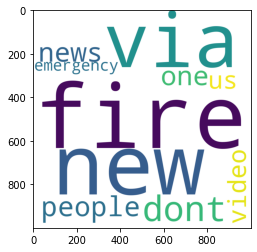

In [94]:
cloud_tweet = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_count)
plt.imshow(cloud_tweet)

**Hacer un histograma con las palabras que más se repiten**

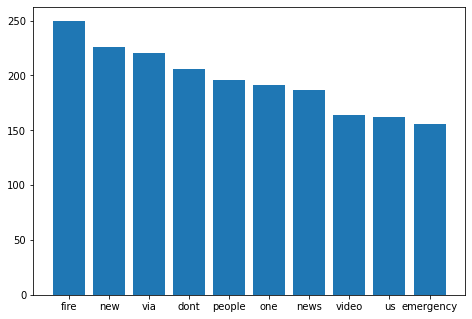

In [95]:
datos_tweet = word_count.most_common(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_tweet]
y_axis = [i[1] for i in datos_tweet]
ax.bar(x_axis,y_axis)
plt.show()

In [96]:
global_data = df['text_without_stopwords']
x = len(global_data)
val=round(x*0.1,0)
random_sample=random.sample(list(global_data),int(val))

digrama=[]
print(digrama)
size=2
def ngram(ngrama, size):
  for word in range(len(random_sample)):
    try:
      for item in ngrams(random_sample[word].split(),size):
          ngrama.append(item)
    except:
        return

ngram(digrama, size)
print(digrama)

[]
[('Hiroshima', 'Nagasaki'), ('Nagasaki', 'remember'), ('remember', 'killed'), ('killed', 'alleged'), ('alleged', 'US'), ('US', 'war'), ('war', 'crimes'), ('crimes', 'using'), ('using', 'nuclear'), ('nuclear', 'weapons'), ('weapons', 'httpstcoNDxrK2NCLN'), ('httpstcoNDxrK2NCLN', 'USWarCrimes'), ('Swiss', 'Kosher'), ('Kosher', 'Hotel'), ('Hotel', 'Bridge'), ('Bridge', 'Collapse'), ('Collapse', 'Injures'), ('Injures', 'Five'), ('Five', 'People'), ('People', 'httptcoTxIestoX5n'), ('httptcoTxIestoX5n', 'JewishPress'), ('RFP', 'Fire'), ('Fire', 'Truck'), ('Truck', 'Service'), ('Service', 'Body'), ('Body', 'F450'), ('F450', 'Fire'), ('Fire', 'fighting'), ('fighting', 'rescue'), ('rescue', 'safety'), ('safety', 'equipment'), ('equipment', 'Transporta'), ('Transporta', 'httptco8GtRvEcE1N'), ('would', 'electrocute'), ('electrocute', 'everyone'), ('everyone', 'uses'), ('uses', 'word'), ('word', 'fair'), ('fair', 'connection'), ('connection', 'income'), ('income', 'tax'), ('tax', 'policies'), (

In [97]:
trigrama=[]
print(trigrama)
size=3
ngram(trigrama, size)
print(trigrama)

[]
[('Hiroshima', 'Nagasaki', 'remember'), ('Nagasaki', 'remember', 'killed'), ('remember', 'killed', 'alleged'), ('killed', 'alleged', 'US'), ('alleged', 'US', 'war'), ('US', 'war', 'crimes'), ('war', 'crimes', 'using'), ('crimes', 'using', 'nuclear'), ('using', 'nuclear', 'weapons'), ('nuclear', 'weapons', 'httpstcoNDxrK2NCLN'), ('weapons', 'httpstcoNDxrK2NCLN', 'USWarCrimes'), ('Swiss', 'Kosher', 'Hotel'), ('Kosher', 'Hotel', 'Bridge'), ('Hotel', 'Bridge', 'Collapse'), ('Bridge', 'Collapse', 'Injures'), ('Collapse', 'Injures', 'Five'), ('Injures', 'Five', 'People'), ('Five', 'People', 'httptcoTxIestoX5n'), ('People', 'httptcoTxIestoX5n', 'JewishPress'), ('RFP', 'Fire', 'Truck'), ('Fire', 'Truck', 'Service'), ('Truck', 'Service', 'Body'), ('Service', 'Body', 'F450'), ('Body', 'F450', 'Fire'), ('F450', 'Fire', 'fighting'), ('Fire', 'fighting', 'rescue'), ('fighting', 'rescue', 'safety'), ('rescue', 'safety', 'equipment'), ('safety', 'equipment', 'Transporta'), ('equipment', 'Transport

In [98]:
tetragrama=[]
print(tetragrama)
size=4
ngram(tetragrama, size)
print(tetragrama)

[]
[('Hiroshima', 'Nagasaki', 'remember', 'killed'), ('Nagasaki', 'remember', 'killed', 'alleged'), ('remember', 'killed', 'alleged', 'US'), ('killed', 'alleged', 'US', 'war'), ('alleged', 'US', 'war', 'crimes'), ('US', 'war', 'crimes', 'using'), ('war', 'crimes', 'using', 'nuclear'), ('crimes', 'using', 'nuclear', 'weapons'), ('using', 'nuclear', 'weapons', 'httpstcoNDxrK2NCLN'), ('nuclear', 'weapons', 'httpstcoNDxrK2NCLN', 'USWarCrimes'), ('Swiss', 'Kosher', 'Hotel', 'Bridge'), ('Kosher', 'Hotel', 'Bridge', 'Collapse'), ('Hotel', 'Bridge', 'Collapse', 'Injures'), ('Bridge', 'Collapse', 'Injures', 'Five'), ('Collapse', 'Injures', 'Five', 'People'), ('Injures', 'Five', 'People', 'httptcoTxIestoX5n'), ('Five', 'People', 'httptcoTxIestoX5n', 'JewishPress'), ('RFP', 'Fire', 'Truck', 'Service'), ('Fire', 'Truck', 'Service', 'Body'), ('Truck', 'Service', 'Body', 'F450'), ('Service', 'Body', 'F450', 'Fire'), ('Body', 'F450', 'Fire', 'fighting'), ('F450', 'Fire', 'fighting', 'rescue'), ('Fire

In [99]:
pentgrama=[]
print(pentgrama)
size=5
ngram(pentgrama, size)
print(pentgrama)

[]
[('Hiroshima', 'Nagasaki', 'remember', 'killed', 'alleged'), ('Nagasaki', 'remember', 'killed', 'alleged', 'US'), ('remember', 'killed', 'alleged', 'US', 'war'), ('killed', 'alleged', 'US', 'war', 'crimes'), ('alleged', 'US', 'war', 'crimes', 'using'), ('US', 'war', 'crimes', 'using', 'nuclear'), ('war', 'crimes', 'using', 'nuclear', 'weapons'), ('crimes', 'using', 'nuclear', 'weapons', 'httpstcoNDxrK2NCLN'), ('using', 'nuclear', 'weapons', 'httpstcoNDxrK2NCLN', 'USWarCrimes'), ('Swiss', 'Kosher', 'Hotel', 'Bridge', 'Collapse'), ('Kosher', 'Hotel', 'Bridge', 'Collapse', 'Injures'), ('Hotel', 'Bridge', 'Collapse', 'Injures', 'Five'), ('Bridge', 'Collapse', 'Injures', 'Five', 'People'), ('Collapse', 'Injures', 'Five', 'People', 'httptcoTxIestoX5n'), ('Injures', 'Five', 'People', 'httptcoTxIestoX5n', 'JewishPress'), ('RFP', 'Fire', 'Truck', 'Service', 'Body'), ('Fire', 'Truck', 'Service', 'Body', 'F450'), ('Truck', 'Service', 'Body', 'F450', 'Fire'), ('Service', 'Body', 'F450', 'Fire',

###**7. Luego de analizar los datos determine:**


In [107]:
def get_tweets(texts):
    corpus = []
    for text in texts:
        corpus.extend(word_tokenize(text))
    return corpus

disaster_tweet = get_tweets(df[df["target"] == 1]["text"])
non_disaster_tweet = get_tweets(df[df["target"] == 0]["text"])


SX = SentimentIntensityAnalyzer()

sentimentValue = np.zeros(len(df['text']))
for k in range(len(df['text'])):
    sentimentValue[k] = SX.polarity_scores(df['text'][k]).get('compound')
df.insert(loc=len(df.columns), column = 'sentimentValue', value = sentimentValue)

In [109]:
# media del dataset
# sentimentValue es -0.15. 
print("Media de sentimiento: ", df['sentimentValue'].mean())

# Los 10 tweets con mayor sentimiento positivo
print(df.sort_values(by='sentimentValue').head(10)['text'])



Media de sentimiento:  -0.14939959280178644
7472    wreck wreck wreck wreck wreck wreck wreck wrec...
6411    Suicide bomber kills 15 in Saudi security site...
6393     19th Day Since 17Jul2015  Nigeria Suicide Bom...
6407    17 killed in SArabia mosque suicide bombingA s...
472     illegal alien released by ObamaDHS 4 times Cha...
1540    Bomb Crash Loot Riot Emergency Pipe Bomb Nucle...
6414    AbuBaraa1 Suicide bomber targets Saudi mosque ...
6818    Bomb head Explosive decisions dat produced mor...
6930    cspan Prez Mr President you are the biggest te...
2932    at the lake sees a dead fishme poor little guy...
Name: text, dtype: object


In [110]:
# Los 10 tweets con menor sentimiento negativo
print(df.sort_values(by='sentimentValue', ascending=False).head(10)['text'])

6992    Check out Want Twister Tickets AND A VIP EXPER...
6534    thoutaylorbrown I feel like accidents are just...
6292    Todays storm will pass let tomorrows light gre...
3163    batfanuk we enjoyed the show today Great fun T...
3382    batfanuk we enjoyed the show today Great fun T...
6778    Maaaaan I love Love Without Tragedy by rihanna...
1001    Im not a Drake fan but I enjoy seeing him body...
2238    MeditationByMSG 45600 ppl got method of medita...
6295    Free Ebay Sniping RT httptcoB231Ul1O1K Lumbar ...
4280    Have you heard 05 LOVE TO LOVE YOUHEAT WAVE VO...
Name: text, dtype: object


In [ ]:
# Los 10 tweets con menor sentimiento negativo
print(df.sort_values(by='sentimentValue', ascending=False).head(10)['text'])


**¿Cuáles son los 10 tweets más negativos?¿En qué categoría están?**


In [111]:
# Promedio de sentimentValue para tweets relacionados a desastre y no desastre.
# La media de los tweets sobre desastre es -0.27.
print("Media sentimentValue desastre: ", df[df["target"] == 1]['sentimentValue'].mean())

Media sentimentValue desastre:  -0.2676087129318251


**¿Cuáles son los 10 tweets más positivos? ¿En qué categoría están?**

In [112]:
# La media de los tweets sobre no desastre es -0.06. 
print("Media sentimentValue no desastre: ", df[df["target"] == 0]['sentimentValue'].mean())

Media sentimentValue no desastre:  -0.06034799631506217
